

#**------------------------------------Vehicles classification-----------------------------------**




Aim of this project is vehicles classification in 5 classes:

Auto, Bus, TempoTraveller, Tractor, Truck. 

*   Auto
*   Bus
*   TempoTraveller
*   Tractor
*   Truck

>  The task was to adopt a fine-tuning strategy using the architecture EfficientNetB3 pre-trained on ImageNet. 

> We have been given a dataset regarding indian vehicles which is possible to download through next link:
https://www.kaggle.com/datasets/dataclusterlabs/indian-vehicle-datasetDivide

   
   
   2. Data preparation: 
   
    For data preparation use ImageDataGenerator with the method flow from-directory.  
    Normalize all the images in the range [0,1]and resize the images using 320×320 pixel. 
    Only during training consider the following data-augmentation operations:  random rotatoinfrom -20 degree to 20 degree, rescaling using a random factor in the range [0.7, 1.3] and horizontalflipping.


   3. Architecture:
   
    Use EfficientNetB3 pre-trained on ImageNet with a dimension of320×320pixels anda number of classes equal to 5.
   
   
   4. Training. 

    For training use the NAdam optimizer by means of the functionkeras.optimizers.Nadam()and  adopt  the  Cross-Entropy  loss  function.  
    Use  the  performance  on  the  validation  set  to  choosethe best parameters for the learning-rate, batch-size, number of epoches and number of layers to befreezed.
   
   5. Performance evaluation. 
   
    Use the test-set to compute the performance in terms of accuracy.

# **1**. **Data** **Preprocessing** 

### **1.1** We use the next command to be sure that all variables are deleted in workspace:

In [ ]:
%reset -f

### **1.2** Then, we do need to import modules for compiling next functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import shutil
import os
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split 
from google.colab import drive

### **1.3** To mount Google Drive to the Collab:

In [2]:
mount='/content/drive'
print("Colab: mounting Google drive on ", mount)

drive.mount(mount)

Colab: mounting Google drive on  /content/drive
Mounted at /content/drive


In [3]:
# Switch to the directory on the Google Drive that we want to use
import os
drive_root = mount + "/MyDrive/Data/Dataset"
  
# Change to the directory
print("\nColab: Changing directory to ", drive_root)
%cd $drive_root


Colab: Changing directory to  /content/drive/MyDrive/Data/Dataset
/content/drive/MyDrive/Data/Dataset


### **1.4** Command to delete the directory:

In [ ]:
'''
#shutil.rmtree('/content/drive/MyDrive/Data/Data')
#shutil.rmtree('/content/drive/MyDrive/Data/Data_Set')
#shutil.rmtree('/content/drive/MyDrive/Data/Data/Test/Tempo Traveller')
#shutil.rmtree('/content/drive/MyDrive/Data/Data/Train/Tempo Traveller')
#shutil.rmtree('/content/drive/MyDrive/Data/Data/Val/Tempo Traveller')
'''

### **1.5** Loading data-set to google drive, next command is used to unzip the indian vehicles dataset

In [ ]:
!unzip /content/drive/MyDrive/Data/Dataset.zip -d /content/drive/MyDrive/Data

### **1.6** Data Cleaning

In [ ]:
#This command is used to identify the files that are corrupted

import glob
import PIL
import tqdm

for filepath in tqdm.tqdm(glob.glob('/content/drive/MyDrive/Data/Data_Set/*/*.jpg')):
 try:
   PIL.Image.open(filepath).load()
 except:
   error = print('\n',filepath,'\n')

100%|██████████| 739/739 [02:30<00:00,  4.91it/s]


In [ ]:
#This command is used to delete the files that are identified as corrupted in the previous step

#import os
#os.remove("/content/drive/MyDrive/Data/Data_Set/Truck/Datacluster Truck (123).jpg")
#os.remove("/content/drive/MyDrive/Data/Data_Set/Tempo Traveller/20210517_06_39_54_000_bsfUf1M1E9bMsvY4ENiWwUWjDQp2_F_4160_3120.jpg")
#os.remove("/content/drive/MyDrive/Data/Data_Set/Bus/20210518_14_58_52_000_RMkLr8rWJDMBfnDv6WRtqfoMLT83_F_3264_2448.jpg")
#os.remove("/content/drive/MyDrive/Data/Data_Set/Tempo Traveller/20210508_10_11_26_000_bsfUf1M1E9bMsvY4ENiWwUWjDQp2_F_4160_3120.jpg")
#os.remove("/content/drive/MyDrive/Data/Data_Set/Tempo Traveller/20210517_06_39_54_000_bsfUf1M1E9bMsvY4ENiWwUWjDQp2_F_4160_3120.jpg ")

##This command helps us to identify and print the number of images divided into number of classses

#import glob

#images = glob.glob('/content/drive/MyDrive/Data/Data_Set/*/*', recursive=True)
#classes = glob.glob(r'/content/drive/MyDrive/Data/Dataset/Test/*')

#print(f'After deleting the corrupted files, we now have {len(images)} images divided into {len(classes)} different classes')

In [ ]:
import glob

images = glob.glob('/content/drive/MyDrive/Data/Dataset/*/*/*', recursive=True)
classes = glob.glob(r'/content/drive/MyDrive/Data/Dataset/Test/*')

print(f'After deleting the corrupted files, we now have {len(images)} images divided into {len(classes)} different classes')

After deleting the corrupted files, we now have 743 images divided into 5 different classes


### **1.7** Data Management: Splitting the dataset into train, test and validation folders

#### 1.7.1 Class 1: Auto

Creation of the list the names of images:

In [ ]:
images_Auto = glob('/content/drive/MyDrive/Data/Data_Set/Auto/*')
len(images_Auto)

152

Splitting the given dataset into train, test and validation:

In [ ]:
train1, temp1 = train_test_split(images_Auto, test_size=0.30,train_size=0.70,
                                 random_state=7, shuffle=True)

test1, val1 = train_test_split(temp1, test_size=0.50, train_size=0.50,
                               random_state=7, shuffle=True)


To create the directory in Google Drive for the test, train and validation splitted:





In [ ]:
#To create the directory and paste the files splitted
#(Training, Test and validation dataset for Auto - Class 1)

os.makedirs('/content/drive/MyDrive/Data/Dataset/Train/Auto/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Test/Auto/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Val/Auto/')

Inserting files into corresponding directories:

In [ ]:
## This Loop adds the Trainig Data created while splitting into the Train Folder

for original in train1:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target1 = '/content/drive/MyDrive/Data/Dataset/Train/Auto/'+ os.path.basename(original)
  shutil.copyfile(original, target1)

## This Loop adds the Test Data created while splitting into the Test Folder

for original in test1:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target2 = '/content/drive/MyDrive/Data/Dataset/Test/Auto/' + os.path.basename(original)
  shutil.copyfile(original, target2)

## This Loop adds the Validation Data created while splitting into the Val Folder

for original in val1:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target3 = '/content/drive/MyDrive/Data/Dataset/Val/Auto/' + os.path.basename(original)
  shutil.copyfile(original, target3)

#### 1.7.2 Class 2: Bus

Creation of the list the names of images:

In [ ]:
images_Bus= glob('/content/drive/MyDrive/Data/Data_Set/Bus/*')
len(images_Bus)

144

Splitting the given dataset into train, test and validation:

In [ ]:
train2, temp2 = train_test_split(images_Bus, test_size=0.30, train_size=0.70,
                                 random_state=7, shuffle=True)

test2, val2 = train_test_split(temp2, test_size=0.50, train_size=0.50,
                               random_state=7, shuffle=True)

To create the directory in Google Drive for the test, train and validation splitted:

In [ ]:
#To create the directory and paste the files splitted
#(Training, Test and validation dataset for Bus - Class 2)

os.makedirs('/content/drive/MyDrive/Data/Dataset/Train/Bus/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Test/Bus/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Val/Bus/')

Inserting files into corresponding directories:

In [ ]:
## This Loop adds the Trainig Data created while splitting into the Train Folder

for original in train2:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target4 = '/content/drive/MyDrive/Data/Dataset/Train/Bus/' + os.path.basename(original)
  shutil.copyfile(original, target4)

## This Loop adds the Test Data created while splitting into the Test Folder

for original in test2:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target5 = '/content/drive/MyDrive/Data/Dataset/Test/Bus/' + os.path.basename(original)
  shutil.copyfile(original, target5)

## This Loop adds the Validation Data created while splitting into the Val Folder

for original in val2:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target6 = '/content/drive/MyDrive/Data/Dataset/Val/Bus/' + os.path.basename(original)
  shutil.copyfile(original, target6)

#### 1.7.3 Class 3: Tempo Traveller

Splitting the given dataset into train, test and validation:

In [ ]:
images_Tempo= glob('/content/drive/MyDrive/Data/Data_Set/Tempo Traveller/*')
len(images_Tempo)

122

Splitting the given dataset into train, test and validation:

In [ ]:
train3, temp3 = train_test_split(images_Tempo, test_size=0.30, train_size=0.70,
                                 random_state=7, shuffle=True)

test3, val3 = train_test_split(temp3, test_size=0.50, train_size=0.50,
                               random_state=7, shuffle=True)

To create the directory in Google Drive for the test, train and validation splitted:




In [ ]:
#To create the directory and paste the files splitted
#(Training, Test and validation dataset for Tempo Traveller - Class 3)

os.makedirs('/content/drive/MyDrive/Data/Dataset/Train/Tempo Traveller/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Test/Tempo Traveller/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Val/Tempo Traveller/')

Inserting files into corresponding directories:

In [ ]:
## This Loop adds the Trainig Data created while splitting into the Train Folder

for original in train3:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target7 = '/content/drive/MyDrive/Data/Dataset/Train/Tempo Traveller/' + os.path.basename(original)
  shutil.copyfile(original, target7)

## This Loop adds the Test Data created while splitting into the Test Folder

for original in test3:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target8 = '/content/drive/MyDrive/Data/Dataset/Test/Tempo Traveller/' + os.path.basename(original)
  shutil.copyfile(original, target8)

## This Loop adds the Validation Data created while splitting into the Val Folder

for original in val3:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target9 = '/content/drive/MyDrive/Data/Dataset/Val/Tempo Traveller/' + os.path.basename(original)
  shutil.copyfile(original, target9)

#### 1.7.4 Class 4: Tractor

In [ ]:
images_Tractor= glob('/content/drive/MyDrive/Data/Data_Set/Tractor/*')
len(images_Tractor)

Splitting the given dataset into train, test and validation:

In [ ]:
train4, temp4 = train_test_split(images_Tractor, test_size=0.30, train_size=0.70,
                                 random_state=7, shuffle=True)

test4, val4 = train_test_split(temp4, test_size=0.50, train_size=0.50,
                               random_state=7, shuffle=True)


To create the directory in Google Drive for the test, train and validation splitted:

In [ ]:
#To create the directory and paste the files splitted
#(Training, Test and validation dataset for Tractor - Class 4)

os.makedirs('/content/drive/MyDrive/Data/Dataset/Train/Tractor/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Test/Tractor/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Val/Tractor/')

Inserting files into corresponding directories:

In [ ]:
## This Loop adds the Trainig Data created while splitting into the Train Folder

for original in train4:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target10 = '/content/drive/MyDrive/Data/Dataset/Train/Tractor/' + os.path.basename(original)
  shutil.copyfile(original, target10)

## This Loop adds the Test Data created while splitting into the Test Folder

for original in test4:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target11 = '/content/drive/MyDrive/Data/Dataset/Test/Tractor/' + os.path.basename(original)
  shutil.copyfile(original, target11)

## This Loop adds the Validation Data created while splitting into the Val Folder

for original in val4:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target12 = '/content/drive/MyDrive/Data/Dataset/Val/Tractor/' + os.path.basename(original)
  shutil.copyfile(original, target12)

#### 1.7.5 Class 5: Truck

Creation of the list the names of images:

In [ ]:
images_Truck= glob('/content/drive/MyDrive/Data/Data_Set/Truck/*')
len(images_Truck)

Splitting the given dataset into train, test and validation:

In [ ]:
train5, temp5 = train_test_split(images_Truck, test_size=0.30, train_size=0.70,
                                 random_state=7, shuffle=True)

test5, val5 = train_test_split(temp5, test_size=0.50, train_size=0.50,
                               random_state=7, shuffle=True)


To create the directory in Google Drive for the test, train and validation splitted:

In [ ]:
#To create the directory and paste the files splitted
#(Training, Test and validation dataset for Truck - Class 5)

os.makedirs('/content/drive/MyDrive/Data/Dataset/Train/Truck/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Test/Truck/')

os.makedirs('/content/drive/MyDrive/Data/Dataset/Val/Truck/')

Inserting files into corresponding directories:

In [ ]:
for original in train5:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target13 = '/content/drive/MyDrive/Data/Dataset/Train/Truck/' + os.path.basename(original)
  shutil.copyfile(original, target13)

## This Loop adds the Test Data created while splitting into the Test Folder

for original in test5:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target14 = '/content/drive/MyDrive/Data/Dataset/Test/Truck/' + os.path.basename(original)
  shutil.copyfile(original, target14)

## This Loop adds the Validation Data created while splitting into the Val Folder

for original in val5:
  #print(os.path.basename(original)) #This command can be used
  #to print the titles in the output window
  target15 = '/content/drive/MyDrive/Data/Dataset/Val/Truck/' + os.path.basename(original)
  shutil.copyfile(original, target15)

### **1.8** Check

In [ ]:
##This command helps us to identify and print the number of images divided into number of classses

import glob

images = glob.glob('/content/drive/MyDrive/Data/Dataset/*/*/*', recursive=True)
classes = glob.glob(r'/content/drive/MyDrive/Data/Dataset/Test/*')

print(f'We have {len(images)} images divided into {len(classes)} different classes')

We have 743 images divided into 5 different classes


In [ ]:
##Reading the Data from the Train dataset

auto = io.imread('/content/drive/MyDrive/Data/Dataset/Train/Auto/Datacluster Auto (103).jpg')
bus = io.imread('/content/drive/MyDrive/Data/Dataset/Train/Bus/20210513_15_45_29_000_RMkLr8rWJDMBfnDv6WRtqfoMLT83_F_3264_2448.jpg')
Tempo_Traveller = io.imread('/content/drive/MyDrive/Data/Dataset/Train/Tempo Traveller/20210505_14_37_31_000_1Zed4Oj2KLbPSd4mUWeNjmCUxNI3_F_4032_3024.jpg')
Tractor = io.imread('/content/drive/MyDrive/Data/Dataset/Train/Tractor/20210530_10_50_21_000_Dl323OoxszOUBxi8FGUILkSQmM62_F_4032_3024.jpg')
truck = io.imread('/content/drive/MyDrive/Data/Dataset/Train/Truck/Datacluster Truck (42).jpg')


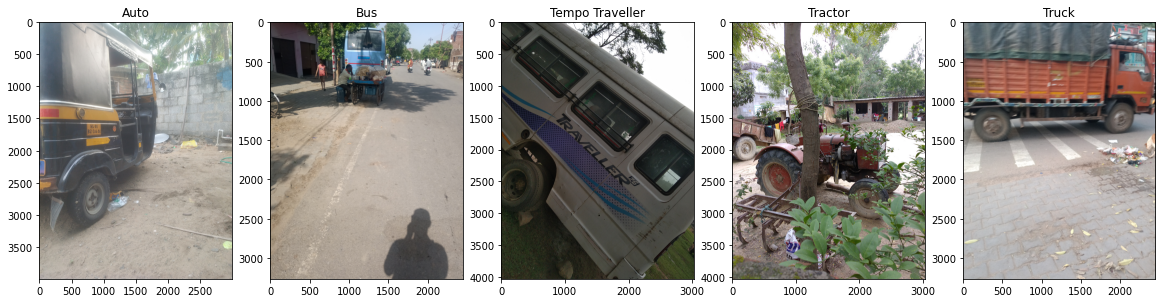

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,5,1); plt.imshow(auto); plt.title('Auto') #1,2,1 means Array of 1 row, 2 columns, 1st position 
plt.subplot(1,5,2); plt.imshow(bus); plt.title('Bus')
plt.subplot(1,5,3); plt.imshow(Tempo_Traveller); plt.title('Tempo Traveller')
plt.subplot(1,5,4); plt.imshow(Tractor); plt.title('Tractor')
plt.subplot(1,5,5); plt.imshow(truck); plt.title('Truck')
plt.show()

# **2.** **Data** **Preparation**

Generation of batches of tensor image data with real-time data augmentation.

In [ ]:
Batch_Size = 10
Target_Size = (320,320)

In [ ]:
#Total images we have in the dataset = 739. Train: 514; Validation: 114;

train_datagen = ImageDataGenerator(rescale = 1.0/255.0, horizontal_flip = True, zoom_range = [0.7, 1.3],
                                    rotation_range = 20)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Data/Dataset/Train/',
target_size = Target_Size,
batch_size = Batch_Size,
class_mode = 'categorical')

val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_generator = val_datagen.flow_from_directory('/content/drive/MyDrive/Data/Dataset/Val/',
target_size = Target_Size,
batch_size = Batch_Size,
class_mode = 'categorical')

Found 514 images belonging to 5 classes.
Found 114 images belonging to 5 classes.


# **3.** **Architecture** **Implementation**

## Architecture Information

We Used **'EfficientNetB3'** pre-trained on ImageNet with a dimension of 320×320 pixels and a number of classes equal to 5.

**3.1** Fine Tuning - Downloading the pre-trained weights for the images from the Imagenet

In [ ]:
##FINE TUNING
#Pre-trained EfficientNetB3 Architecture

import tensorflow as tf

base_model = tf.keras.applications.EfficientNetB3(weights='imagenet', include_top=False, input_shape=(320, 320, 3))
#Input_Shape=(rows, columns, channels) - Channels are always 3 for color images = RGB

**3.2** Layers Creation

In [ ]:
from tensorflow import keras
import tensorflow.keras.layers as layers

model = keras.models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 10, 10, 1536)     10783535  
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 7685      
                                                                 
Total params: 10,791,220
Trainable params: 10,703,917
Non-trainable params: 87,303
_________________________________________________________________


In [ ]:
##This command helps us to denote the numebr of layers in the network
len(base_model.layers)

384

**3.3** Freeze Initial Layers

During training, trainNetwork does not update the parameters of the frozen layers. Because the gradients of the frozen layers do not need to be computed, freezing the weights of many initial layers can significantly speed up network training. If the new data set is small, then freezing earlier network layers can also prevent those layers from overfitting to the new data set.

In [ ]:
##Freezing the initial Layers for computation purpose

train_after_layer = 50
for layer in base_model.layers[:train_after_layer]:
  layer.trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 10, 10, 1536)     10783535  
                                                                 
 global_average_pooling2d_1   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 5)                 7685      
                                                                 
Total params: 10,791,220
Trainable params: 10,678,735
Non-trainable params: 112,485
_________________________________________________________________


# **4.** **Training**

#### Optimizer Implementation - NADAM Optimizer

In [ ]:
#Creation of Checkpoint Directory 

#os.makedirs('/content/drive/MyDrive/Data/Dataset/Checkpoint/')

#### We can use a trained model without having to retrain it, or pick-up training where you left off in case the training process was interrupted. The tf.keras.callbacks.ModelCheckpoint callback allows you to continually save the model both during and at the end of training.

In [4]:
# Switch to the directory on the Google Drive that you want to use
import os
checkpoint_root = drive_root + "/Checkpoint/Saved_Models"
  
# Change to the directory
print("\nColab: Changing directory to ", drive_root)
%cd $checkpoint_root


Colab: Changing directory to  /content/drive/MyDrive/Data/Dataset
/content/drive/MyDrive/Data/Dataset/Checkpoint/Saved_Models


In [ ]:
#Before training, we need to define the loss, optimizer and other metrics:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
#EarlyStopping function is used to identify the number of Epochs required to fit the model (avoiding the chances of overfitting the model)
#ModelCheckpoint function is used to save the trained model so that the next training can be performed from this checkpoint

model.compile(loss='categorical_crossentropy',
optimizer = keras.optimizers.Nadam(learning_rate = 0.0005, epsilon = 1e-07),
metrics = ['accuracy'])
filepath = "checkpoint_root/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'min')
Earlystopping = EarlyStopping(monitor = 'val_loss', verbose = 1, mode = 'min', patience = 10, restore_best_weights = True)
callback_list = [Earlystopping, checkpoint]


In [ ]:
#Fitting the Model

h = model.fit(train_generator, epochs = 32, batch_size = Batch_Size, validation_data = val_generator,
              verbose = True, callbacks = callback_list)

Epoch 1/32
52/52 [==============================] - ETA: 0s - loss: 1.6045 - accuracy: 0.3016
Epoch 1: val_loss improved from inf to 1.66229, saving model to checkpoint_root/weights-improvement-01-0.20.hdf5
52/52 [==============================] - 527s 9s/step - loss: 1.6045 - accuracy: 0.3016 - val_loss: 1.6623 - val_accuracy: 0.2018
Epoch 2/32
52/52 [==============================] - ETA: 0s - loss: 1.4602 - accuracy: 0.3774 
Epoch 2: val_loss did not improve from 1.66229
52/52 [==============================] - 568s 11s/step - loss: 1.4602 - accuracy: 0.3774 - val_loss: 1.6839 - val_accuracy: 0.1754
Epoch 3/32
52/52 [==============================] - ETA: 0s - loss: 1.3007 - accuracy: 0.4572
Epoch 3: val_loss did not improve from 1.66229
52/52 [==============================] - 540s 10s/step - loss: 1.3007 - accuracy: 0.4572 - val_loss: 1.6637 - val_accuracy: 0.1754
Epoch 4/32
52/52 [==============================] - ETA: 0s - loss: 1.1108 - accuracy: 0.5778
Epoch 4: val_loss improv

In [ ]:
val_results=model.evaluate(val_generator)
print(val_results)

16/16 [==============================] - 40s 2s/step - loss: 1.2421 - accuracy: 0.5614
[1.2421081066131592, 0.5614035129547119]


In [ ]:
Train_results=model.evaluate(train_generator)
print(Train_results)

16/16 [==============================] - 62s 4s/step - loss: 0.7860 - accuracy: 0.7625
[0.7859922647476196, 0.762499988079071]


In [ ]:
#SAVING THE MODEL

os.remove('/content/drive/MyDrive/Data/Dataset/Checkpoint/Saved_Models/IC_Augmented_Model_1.h5')

model.save('IC_Augmented_Model_1.h5')


In [ ]:
#Loading the Saved Model and Fitting the new model

from keras.models import load_model

new_model = load_model('IC_Augmented_Model_1.h5')
results = new_model.evaluate(val_generator)
print(results)

k = new_model.fit(train_generator, epochs = 5, batch_size = Batch_Size, validation_data = val_generator, verbose = True)

new_model.save('IC_Augmented_Model_Updated.h5')

12/12 [==============================] - 42s 3s/step - loss: 1.2421 - accuracy: 0.5614
[1.2421081066131592, 0.5614035129547119]
Epoch 1/5
52/52 [==============================] - 526s 10s/step - loss: 0.5008 - accuracy: 0.8113 - val_loss: 1.7891 - val_accuracy: 0.3947
Epoch 2/5
52/52 [==============================] - 505s 10s/step - loss: 0.5405 - accuracy: 0.8210 - val_loss: 2.4430 - val_accuracy: 0.3772
Epoch 3/5
52/52 [==============================] - 500s 10s/step - loss: 0.3819 - accuracy: 0.8658 - val_loss: 2.3973 - val_accuracy: 0.5000
Epoch 4/5
52/52 [==============================] - 500s 10s/step - loss: 0.4892 - accuracy: 0.8288 - val_loss: 1.6962 - val_accuracy: 0.4649
Epoch 5/5
52/52 [==============================] - 499s 10s/step - loss: 0.3835 - accuracy: 0.8658 - val_loss: 1.8195 - val_accuracy: 0.4912


History of Model Accuracy and Validation Accuracy

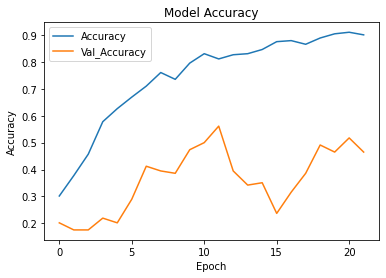

In [ ]:
# summarize history for accuracy and Validation Accuracy

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Val_Accuracy'], loc='upper left')
plt.show()

History of Model Loss and Validation Loss

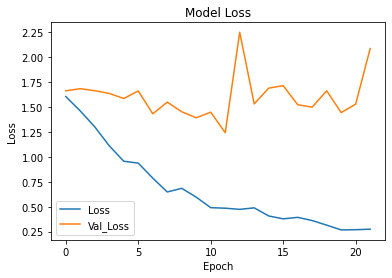

In [ ]:
# summarize history for loss between Train and Validation Set
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_Loss'], loc='lower left')
plt.show()

# **5.** **Performance** **Evaluation**

In [ ]:
#Evaluation of the Test Data - Test: 111 images in total;

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Data/Dataset/Test/',
target_size=(320,320),
batch_size=111,
shuffle=False,
class_mode='categorical')

#Shuffle is FALSE as we want to evalute the test data in order

Found 111 images belonging to 5 classes.


In [ ]:
#The Loss Funtion
#model.load_weights('/content/drive/MyDrive/Data/Dataset/Checkpoint')

loss, acc = model.evaluate(test_generator)

#print(loss, acc)
print("    Test Loss:",(loss))
#print("Test Accuracy:",(acc*100),"%")
print("Test Accuracy:","{:5.2f}%".format(acc*100))

1/1 [==============================] - 43s 43s/step - loss: 1.4564 - accuracy: 0.2793
    Test Loss: 1.456397294998169
Test Accuracy: 27.93%


In [ ]:
from glob import glob

Test_Auto = glob('/content/drive/MyDrive/Data/Dataset/Test/Auto/*')
print(f'We have {len(Test_Auto)} images in Class 1: Auto')

Test_Bus = glob('/content/drive/MyDrive/Data/Dataset/Test/Bus/*')
print(f'We have {len(Test_Bus)} images in Class 2: Bus')

Test_Tempo = glob('/content/drive/MyDrive/Data/Dataset/Test/Tempo Traveller/*')
print(f'We have {len(Test_Tempo)} images in Class 3: Tempo Traveller')

Test_Tractor = glob('/content/drive/MyDrive/Data/Dataset/Test/Tractor/*')
print(f'We have {len(Test_Tractor)} images in Class 4: Tractor')

Test_Truck = glob('/content/drive/MyDrive/Data/Dataset/Test/Truck/*')
print(f'We have {len(Test_Truck)} images in Class 5: Truck')

print(f'We have {len(Test_Auto)+len(Test_Bus)+len(Test_Tempo)+len(Test_Tractor)+len(Test_Truck)} images in 5 Classes')

We have 23 images in Class 1: Auto
We have 22 images in Class 2: Bus
We have 17 images in Class 3: Tempo Traveller
We have 20 images in Class 4: Tractor
We have 29 images in Class 5: Truck
We have 111 images in 5 Classes


In [ ]:
#Testing the Performance of the TEST DATA using the Trained Dataset
x_test, y_labels= next(test_generator)
z=y_labels

id = 111
img = x_test[id,:,:,:]
print(z[id])
x = np.expand_dims(img, 0) #1X28X28X1
p = model.predict(x) #1X10
print(p[0,:])
plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
#plt.imshow(np.rot90(img,-1))
plt.imshow(img)
plt.subplot(1,2,2)
n=plt.bar(np.arange(5), p[0]) #, color=('yellow', 'red', 'green', 'blue', 'gray'))
for rect1 in n:
    height = rect1.get_height()
    plt.annotate( "{:5.2f}%".format(height*100),(rect1.get_x() + rect1.get_width()/2, height+0.01),ha="center",va="top",fontsize=10)
plt.xticks(np.arange(5), ['Auto','Bus','Tempo','Tractor','Truck'])
plt.show()